In [1]:
from radius import *
# Enable interactive mode
# %matplotlib widget
# Cause issues with the plot when openning notebook

In [2]:
def save_radius(path, r_ini, t_ini, region_switch=False, image_switch=False,mini=[False], amax=[False] ):
    average, x_dist, dt, delay = timelapse(path, region_switch)
    r, t, dh, dx, da = radius_time(x_dist, average, dt, delay, r_ini=r_ini, t_ini=t_ini, mini=mini, amax=amax)
    exp = ' '.join(path.split(' ')[3:6]).split('/')[0]
    r_tot = [item for sublist in r for item in sublist]
    t_tot = [item for sublist in t for item in sublist]

    filename = f"data/{exp}.csv"
    df = pd.DataFrame({'Radius': r_tot, 'Time': t_tot})
    #df.to_csv(filename, index=False)
    print(exp)

save_radius('24-06-10 silicon oil 15min 1170C 100_000cst', r_ini=755, t_ini=60*110)

save_radius('24-06-17 silicon oil 15min 1150C 100_000cst', r_ini=312, t_ini=15*60)

save_radius('24-06-20 silicon oil 6min 1150C 100_000cst', r_ini=-120, t_ini=60*12, amax=[True, 0])

save_radius('24-06-13 silicon oil 15min 1130C 100_000cst/Position 3', r_ini=-25, t_ini=60*65)

save_radius('24-06-06 silicon oil ref wafer 100_000cst', r_ini=250, t_ini=3600)

#save_radius('24-06-24 silicone oil 30min 1170C 100_000cst', r_ini=-56, t_ini=60*15, amax=[True, True,0,0,0])

save_radius('24-07-15 silicone oil 40min 1130C 100cst', r_ini=1150, t_ini=4*60+40)

save_radius('24-07-16 silicone oil 40min 1150C 100cst', r_ini=1300, t_ini=4*60, region_switch=True, image_switch=True)

save_radius('24-07-17 silicone oil 40min 1170C 100cst', r_ini=2319, t_ini=4*60+50)

save_radius('24-07-18 silicone oil 40min 1190C 100cst', r_ini=649, t_ini=5*60, region_switch=True, image_switch=True)

save_radius('24-07-09 silicone oil 0min 1190C 100cst', r_ini=680, t_ini=2*60)

save_radius('24-07-29 silicone oil 15min 1130C 100cst', r_ini=1560, t_ini=60*2)

save_radius('24-08-01 silicone oil 15min 1150C 100cst', r_ini=225, t_ini=60*1)

save_radius('24-08-02 silicone oil 15min 1170C 100cst', r_ini=274, t_ini=60*2)

save_radius('24-08-05 silicone oil 15min 1190C 100cst', r_ini=806, t_ini=60*2)

save_radius('24-08-07 silicone oil 30min 1190C 100cst', r_ini=321, t_ini=60*3)

save_radius('24-09-16 silicone oil 40min 1130C 10000cst', r_ini=871, t_ini=60*2 + 45)

save_radius('24-09-13 silicone oil ref wafer 100cst', r_ini=513, t_ini=60*3 + 45)

save_radius('24-06-06 silicon oil ref wafer 100_000cst', r_ini=460, t_ini=3600)

15min 1170C 100_000cst
15min 1150C 100_000cst
6min 1150C 100_000cst
15min 1130C 100_000cst
ref wafer 100_000cst
40min 1130C 100cst
40min 1150C 100cst
40min 1170C 100cst
40min 1190C 100cst
0min 1190C 100cst
15min 1130C 100cst
15min 1150C 100cst
15min 1170C 100cst
15min 1190C 100cst
30min 1190C 100cst
40min 1130C 10000cst
ref wafer 100cst
ref wafer 100_000cst


40min 1130C 100cst
100cst
40min 1150C 100cst
100cst
40min 1190C 100cst
100cst
ref wafer 100_000cst
100_000cst


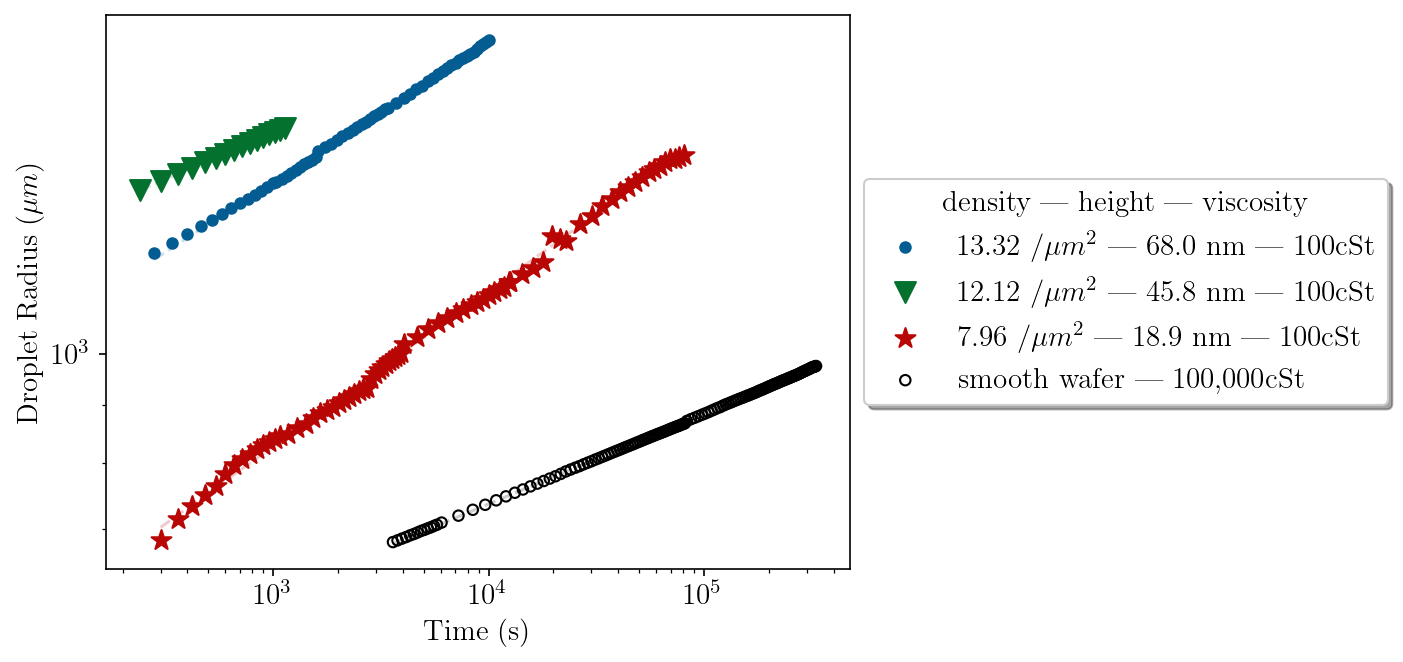

{'T1130C_t40min': 0.12391060351291798, 'T1150C_t40min': 0.08144329942908492, 'T1190C_t40min': 0.1369591645518342, 'Twafer_tref': 0.07962453766340988}


In [71]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14,
})
path = 'data/'
edge = {
    "100_000cst": 'black',
    "100cst": None,
    "10000cst": None
}

marks = {'1130C': ".", '1150C': "v", '1170C': "s", '1190C': "*", "wafer": '.'}
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']
def power_law(t, a, a0):
        return a0 * (t ** a)
def power_law_fit(r,t, a=0.1, a0=100):
    '''
    Calculate a fit of the radius over time
    
    r (lists, float): radius data of timelapses
    t (lists, float): times data of timelapses

    return: r_fit (lists, float): all the radius in one single list
            t_fit (lists, float): all the times in one single list
            popt (float): fitted power indice
    '''

    popt, pcov = curve_fit(power_law, t, r, p0 = (a, a0), maxfev=1000000)
    r_fitted = power_law(t, *popt)
    return r_fitted, t, popt

colors = {}
for i, t in enumerate(reversed(temps)):
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)
    for j, k in enumerate(times):
        exp = f'{k} {t}'
        color = cmap(1 - j / (num_lines - 1))
        colors[exp] = color
colors['ref wafer'] = 'black'
powa = {}
plt.figure(dpi=150)
for file in os.listdir(path):
    try:
        df = pd.read_csv(path + file)
        
        r = df['Radius']
        t = df['Time']
        exp = file.split('.csv')[0]
        col = ' '.join(file.split(' ')[0:2])
        T = file.split(' ')[1]
        k = file.split(' ')[0]
        if (k == '40min' or k == 'ref')  and file.split(' ')[-1].split('.csv')[0] != '10000cst': 
            name = f'T{T}_t{k}'
            r_fit, t_fit, popt = power_law_fit(r,t)
            powa[f'{name}'] = popt[0]
            print(exp)
            #
            dens = density[name]
            h = height[name]

            exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 100cSt'
            face = colors[col]

            if file.split(' ')[-1].split('.csv')[0] == '100_000cst':
                exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 100,000cSt'
                face = 'none'
            print(file.split(' ')[-1].split('.csv')[0])
            if file.split(' ')[-1].split('.csv')[0] == '10000cst':
                exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 10,000cSt'
                face = 'none'

            if k =='0min':
                exp_name = 'smooth wafer | 100cSt'
                face = 'none'
                colors[col] = 'black'
            if k == 'ref':
                exp_name = 'smooth wafer | 100,000cSt'
                face = 'none'
                zord=1
            #: $r \sim t^{{{popt[0]:.2f}}}$
            plt.scatter(t, r, label = fr"{exp_name}",
                    marker=marks[file.split(' ')[1].split('.csv')[0]], facecolors=face, edgecolors=colors[col], linewidths=1, s=100)
            plt.plot(t_fit, r_fit, '--', c=colors[col], alpha=0.2)
            plt.plot(0,0)
    except FileNotFoundError:
        print(f"Error: File '{file}' not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file}' is empty.")
    except Exception as e:
        print(f"An error occurred: {e}")

#plt.legend(prop={'size': 8})
plt.xlabel('Time (s)')
plt.ylabel(r'Droplet Radius ($\mu m$)')
# Shrink current axis by 20%
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title="density | height | viscosity")
#plt.title('Radius of the droplets over time')
plt.xscale('log')
plt.yscale('log')
#plt.savefig('../figures/droplet_radius_40min.png', dpi=300, bbox_inches='tight')
plt.show()
print(powa)

40min 1130C 10000cst
10000cst
40min 1130C 100cst
100cst
ref wafer 100_000cst
100_000cst


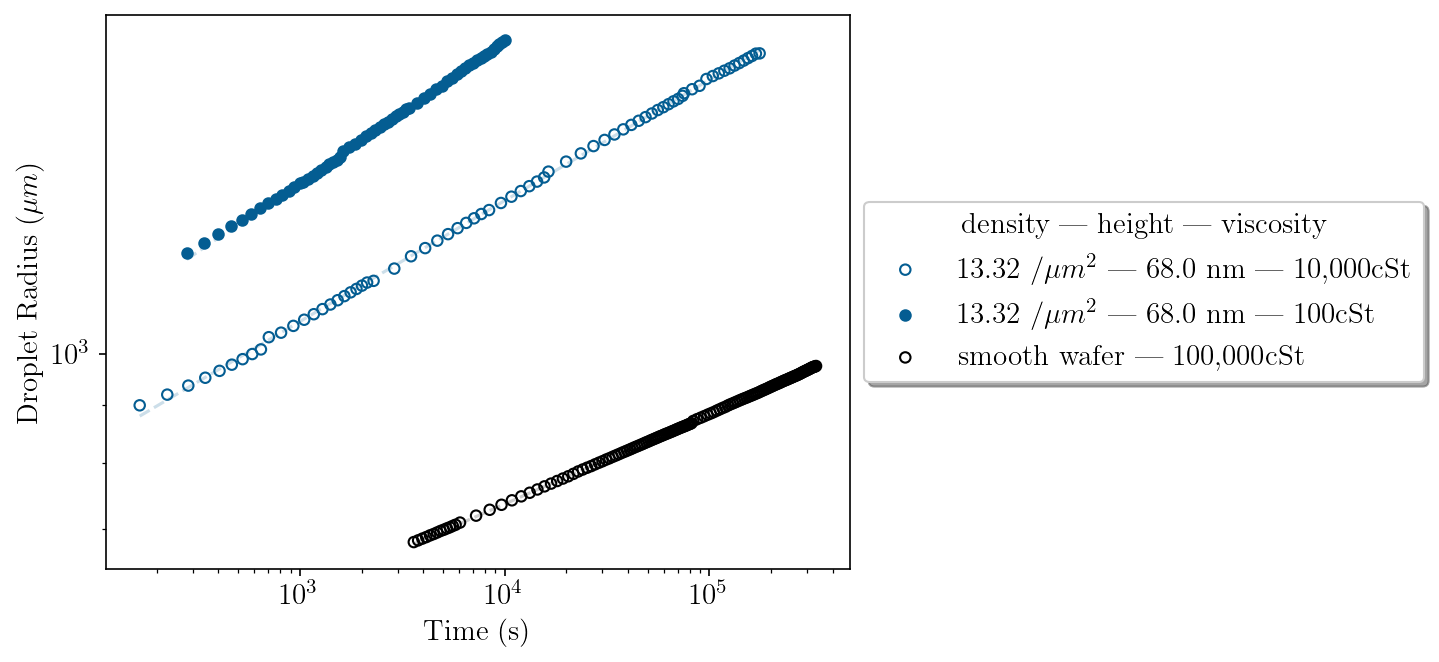

{'T1130C_t40min': 0.12391060351291798, 'T1150C_t40min': 0.08144329942908492, 'T1190C_t40min': 0.1369591645518342, 'Twafer_tref': 0.07962453766340988}


In [70]:
plt.figure(dpi=150)
for file in os.listdir(path):
    try:
        df = pd.read_csv(path + file)
        
        r = df['Radius']
        t = df['Time']
        exp = file.split('.csv')[0]
        col = ' '.join(file.split(' ')[0:2])
        T = file.split(' ')[1]
        k = file.split(' ')[0]
        if (T == '1130C' and k == "40min") or k == 'ref': 
            name = f'T{T}_t{k}'
            r_fit, t_fit, popt = power_law_fit(r,t)
            powa[f'{name}'] = popt[0]
            print(exp)
            #
            dens = density[name]
            h = height[name]

            exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 100cSt'
            face = colors[col]

            if file.split(' ')[-1].split('.csv')[0] == '100_000cst':
                exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 100,000cSt'
                face = 'none'
            print(file.split(' ')[-1].split('.csv')[0])
            if file.split(' ')[-1].split('.csv')[0] == '10000cst':
                exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 10,000cSt'
                face = 'none'

            if k =='0min':
                exp_name = 'smooth wafer | 100cSt'
                face = 'none'
                colors[col] = 'black'
            if k == 'ref':
                exp_name = 'smooth wafer | 100,000cSt'
                face = 'none'
                zord=1
            #: $r \sim t^{{{popt[0]:.2f}}}$
            plt.scatter(t, r, label = fr"{exp_name}",
                    marker=marks[file.split(' ')[1].split('.csv')[0]], facecolors=face, edgecolors=colors[col], linewidths=1, s=100)
            plt.plot(t_fit, r_fit, '--', c=colors[col], alpha=0.2)
            plt.plot(0,0)
    except FileNotFoundError:
        print(f"Error: File '{file}' not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file}' is empty.")
    except Exception as e:
        print(f"An error occurred: {e}")

plt.xlabel('Time (s)')
plt.ylabel(r'Droplet Radius ($\mu m$)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title="density | height | viscosity")
plt.xscale('log')
plt.yscale('log')
#plt.savefig('../figures/droplet_radius_15min.png', dpi=300, bbox_inches='tight')
plt.show()
print(powa)

15min 1190C 100cst
100cst
30min 1190C 100cst
100cst
40min 1190C 100cst
100cst
ref wafer 100_000cst
100_000cst


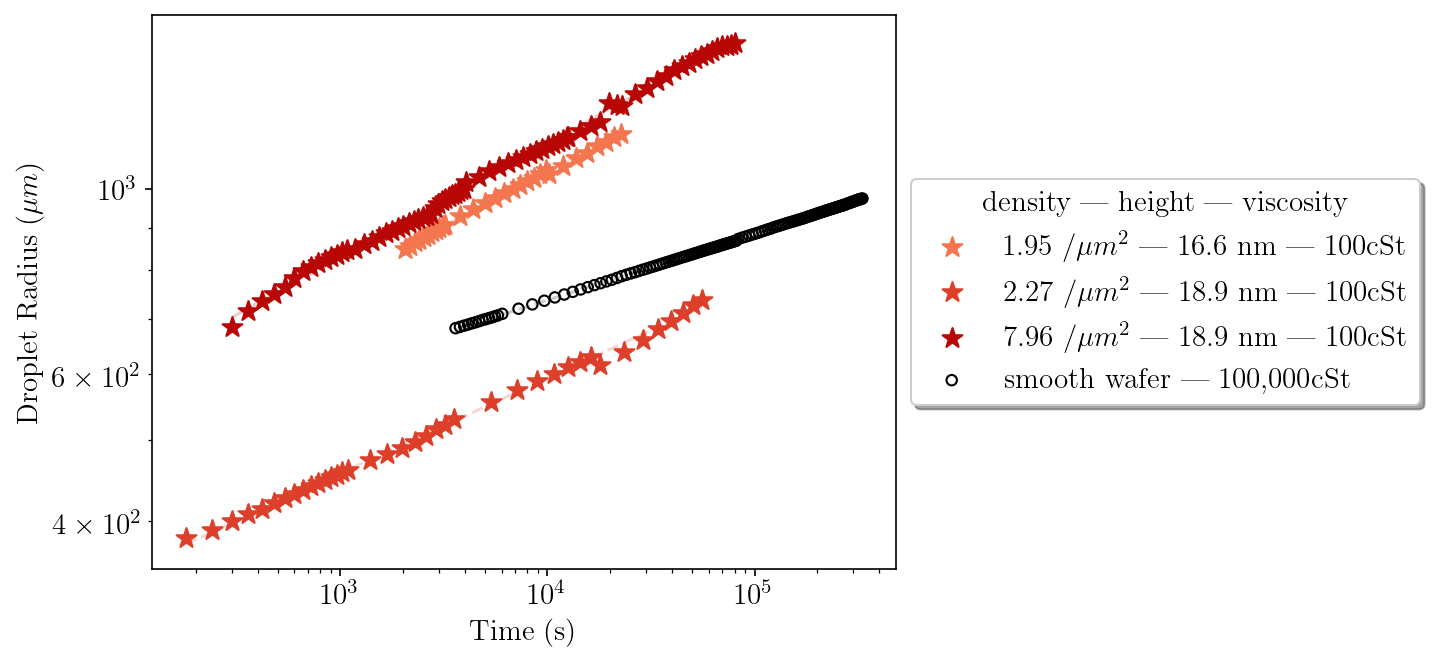

{'T1130C_t40min': 0.11411834137991629, 'T1150C_t40min': 0.12391060351291798, 'T1190C_t40min': 0.1369591645518342, 'Twafer_tref': 0.07962453766340988, 'Twafer_t0min': 0.07962453766340988, 'T1150C_t6min': 0.1369591645518342, 'T1190C_t30min': 0.11411834137991629, 'T1190C_t15min': 0.12919628293563148, 'T1170C_t15min': 0.11222166155518883, 'T1150C_t15min': 0.14494563113421416, 'T1130C_t0min': 0.07962453766340988}


In [61]:
height = np.load('height_dict.npy',allow_pickle='TRUE').item()

density = np.load('density_dict.npy',allow_pickle='TRUE').item()
height['Twafer_tref'] = 0
density['Twafer_tref'] = 0
height['Twafer_t0min'] = 0
density['Twafer_t0min'] = 0

plt.figure(dpi=150)
for file in os.listdir(path):
    try:
        df = pd.read_csv(path + file)
        
        r = df['Radius']
        t = df['Time']
        exp = file.split('.csv')[0]
        col = ' '.join(file.split(' ')[0:2])
        T = file.split(' ')[1]
        k = file.split(' ')[0]
        if T == '1190C' or k == 'ref': 
            name = f'T{T}_t{k}'
            r_fit, t_fit, popt = power_law_fit(r,t)
            powa[f'{name}'] = popt[0]
            print(exp)
            #
            dens = density[name]
            h = height[name]

            exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 100cSt'
            face = colors[col]

            if file.split(' ')[-1].split('.csv')[0] == '100_000cst':
                exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 100,000cSt'
                face = 'none'
            print(file.split(' ')[-1].split('.csv')[0])
            if file.split(' ')[-1].split('.csv')[0] == '10000cst':
                exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm | 10,000cSt'
                face = 'none'

            if k =='0min':
                exp_name = 'smooth wafer | 100cSt'
                face = 'none'
                colors[col] = 'black'
            if k == 'ref':
                exp_name = 'smooth wafer | 100,000cSt'
                face = 'none'
                zord=1
            #: $r \sim t^{{{popt[0]:.2f}}}$
            plt.scatter(t, r, label = fr"{exp_name}",
                    marker=marks[file.split(' ')[1].split('.csv')[0]], facecolors=face, edgecolors=colors[col], linewidths=1, s=100)
            plt.plot(t_fit, r_fit, '--', c=colors[col], alpha=0.2)
            plt.plot(0,0)
    except FileNotFoundError:
        print(f"Error: File '{file}' not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file}' is empty.")
    except Exception as e:
        print(f"An error occurred: {e}")

plt.xlabel('Time (s)')
plt.ylabel(r'Droplet Radius ($\mu m$)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title="density | height | viscosity")
plt.xscale('log')
plt.yscale('log')
plt.savefig('../figures/droplet_radius_1190C.png', dpi=300, bbox_inches='tight')
plt.show()
print(powa)

ref wafer 100_000cst
100_000cst
6min 1150C 100_000cst
100_000cst
40min 1190C 100cst
100cst
40min 1150C 100cst
100cst
40min 1130C 100cst
100cst
40min 1130C 10000cst
10000cst
30min 1190C 100cst
100cst
15min 1190C 100cst
100cst
15min 1170C 100_000cst
100_000cst
15min 1150C 100_000cst
100_000cst
15min 1130C 100cst
100cst


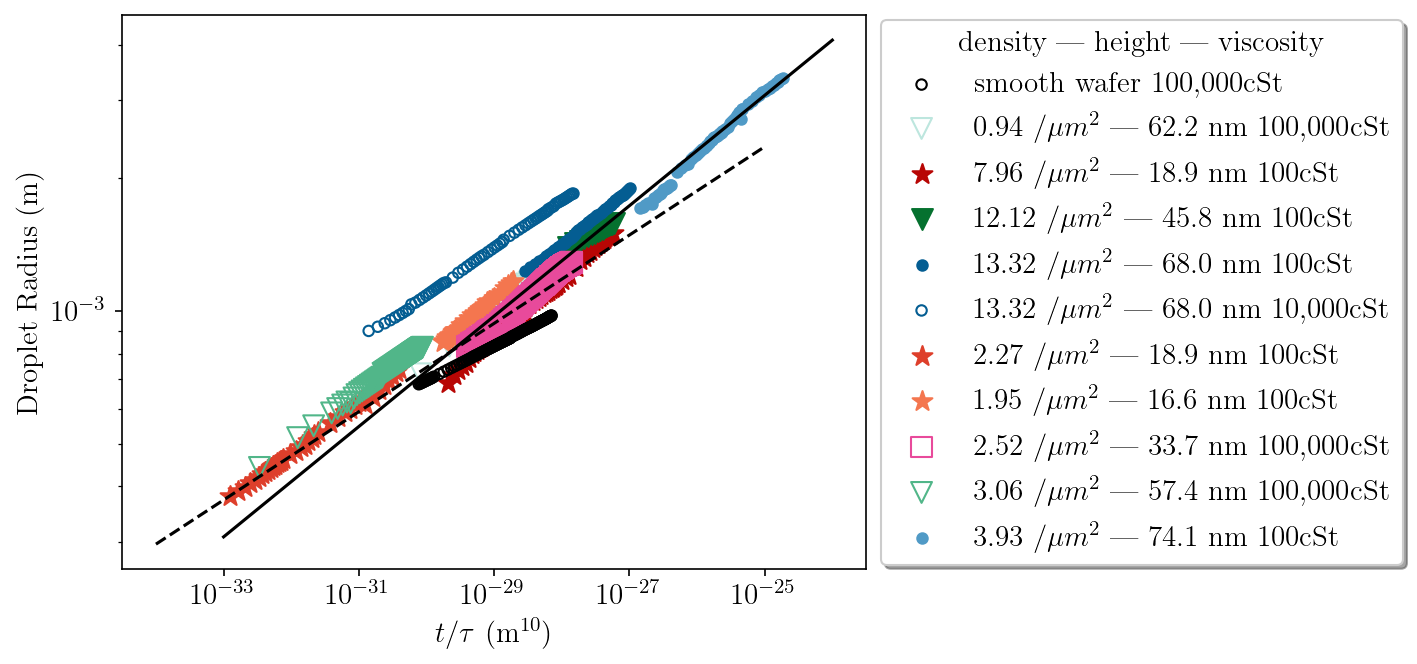

In [96]:
path = 'data/'
edge = {
    "100_000cst": 'black',
    "100cst": None,
    "wafer": None,
    "10000cst": None
}
times = ['50min','40min','30min','15min','8min','6min','3min','0min']
temps = ['1190C','1170C','1150C','1130C']
col = ['PuBu', 'BuGn', 'RdPu', 'OrRd']

colors = {}
for i, t in enumerate(reversed(temps)):
    cmap = plt.get_cmap(col[i])
    num_lines = len(times)
    for j, k in enumerate(times):
        exp = f'{k} {t}'
        color = cmap(1 - j / (num_lines - 1))
        colors[exp] = color
colors['ref wafer'] = 'black'
marks = {'1130C': ".", '1150C': "v", '1170C': "s", '1190C': "*", "wafer": '.'}
vol = {'15min 1170C 100_000cst': 0.02896458666819679, '15min 1150C 100_000cst': 0.0054753471962565, '6min 1150C 100_000cst': 0.03672917652720812, '15min 1130C 100_000cst': 0.02234160669960495, 'ref wafer 100_000cst': 0.021034093789138907, '40min 1130C 100cst': 0.01638716662367604, '40min 1150C 100cst': 0.02821391656759003, '40min 1170C 100cst': 0.02323518336203401, '40min 1190C 100cst': 0.006746175280507629, '15min 1130C 100cst': 0.04797280199472085, '15min 1150C 100cst': 0.0007906401351394383, '15min 1170C 100cst': 0.0011087578072419412, '15min 1190C 100cst': 0.0033312012342024545, '30min 1190C 100cst': 0.0006707300315414209, '0min 1190C 100cst': 0.004838016782612242, '40min 1130C 10000cst': 0.015453619926714308, 'ref wafer 100cst': 0.007753639164618823}
height = np.load('height_dict.npy',allow_pickle='TRUE').item()

density = np.load('density_dict.npy',allow_pickle='TRUE').item()
height['Twafer_tref'] = 0
density['Twafer_tref'] = 0
height['Twafer_t0min'] = 0
density['Twafer_t0min'] = 0

plt.figure(dpi=150)
for file in os.listdir(path)[::-1]:
    try: 
        # read the CSV file into a DataFrame
        df = pd.read_csv(path + file)
        
        r = df['Radius']
        t = df['Time']
        
        exp = file.split('.csv')[0]
        col = ' '.join(file.split(' ')[0:2])

        visc = float(''.join(file.split(' ')[2].split('cst')[0].split('_')))*1e-6 * 1000
        tens=20*10**-3
        B=(1.186)**10
        V = vol[exp]* (10**(-9))
        R = ((tens/visc) * (V)**3)
        r_fit, t_fit, popt = power_law_fit(r,t)

        r_fit, t_fit, popt = power_law_fit(r,t)
        powa[f'{name}'] = popt[0]
        print(exp)
        #
        zord=-1
        T = file.split(' ')[1]
        k = file.split(' ')[0]
        name = f'T{T}_t{k}'
        dens = density[name]
        h = height[name]

        exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm 100cSt'
        face = colors[col]

        if file.split(' ')[-1].split('.csv')[0] == '100_000cst':
            exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm 100,000cSt'
            face = 'none'
        print(file.split(' ')[-1].split('.csv')[0])
        if file.split(' ')[-1].split('.csv')[0] == '10000cst':
            exp_name = fr'{dens:.2f} $/\mu m^2$ | {h:.1f} nm 10,000cSt'
            face = 'none'

        if k =='0min':
            exp_name = 'smooth wafer 100cSt'
            face = 'none'
            colors[col] = 'black'
        if k == 'ref':
            exp_name = 'smooth wafer 100,000cSt'
            face = 'none'
            zord=1
        #: $r \sim t^{{{popt[0]:.2f}}}$
        plt.scatter( ((10/9)*(4* V / np.pi)**3 * t / visc), r*1e-6, label = fr"{exp_name}",
                marker=marks[file.split(' ')[1].split('.csv')[0]], facecolors=face, edgecolors=colors[col], linewidths=1, s=100, zorder=zord)
        
        #plt.plot(np.logspace(-51,-43, 100), 80e7 * np.logspace(-51,-43, 100)**(1/8))

        #plt.plot(R*np.array(t_fit)**(1/10), r_fit, '--', c=colors[col], label=f'{file.split('csv')[0]}: r = t^({popt[0]:.3f})')
        plt.plot(0,0)
    except FileNotFoundError:
        print(f"Error: File '{file}' not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{file}' is empty.")
    except Exception as e:
        print(f"An error occurred: {e}")
plt.plot(np.logspace(-34,-25, 100), 1.1 * tens**(1/10) * np.logspace(-34,-25, 100)**(1/10), '--', c='black')
plt.plot(np.logspace(-33,-24, 100), 1.3 * (1000 * 9.81)**(1/8)* np.logspace(-33,-24, 100)**(1/8), '-', c='black')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, title=r'density | height | viscosity')
plt.xlabel(r'$t / \tau$  (m$^{10}$)')
plt.ylabel(r'Droplet Radius (m)')
#plt.title('Master curve, radius of the droplets over time')
plt.xscale('log')
plt.yscale('log')
#plt.savefig('../figures/master_curve.png', dpi=300, bbox_inches='tight')
plt.show()